In [2]:
%matplotlib inline
from PIL import Image
import os
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
train_dir = "./INRIAPerson/train_64x128_H96"
neg="neg.lst"
pos='pos.lst'
neg=os.path.join(train_dir, neg)
pos=os.path.join(train_dir, pos)
print("neg images are stored at:",neg)
print("pos images are stored at:",pos)

neg images are stored at: ./INRIAPerson/train_64x128_H96/neg.lst
pos images are stored at: ./INRIAPerson/train_64x128_H96/pos.lst


In [4]:
#Create two lists that contain locations of positive and negative images
posList=[]
negList=[]
with open(neg, 'r') as f:
    for line in f:
        line=line[6:].strip('\n')
        line=os.path.join(train_dir, line)
        negList.append(line)
with open(pos, 'r') as f:
    for line in f:
        line=line[6:].strip('\n')
        line=os.path.join(train_dir, line)
        posList.append(line)
negList=np.array(negList)
posList=np.array(posList)

In [58]:
jpgim=Image.open(negList[217], 'r')
pngim=Image.open(posList[0], 'r')
posList[0][-3:]=='png'

True

In [52]:
result=[]
for i in negList:
    
    im=Image.open(i, 'r')
    result.append(im.size[1])

In [57]:
np.argmin(result)

217

In [59]:
jpgimg=np.asarray(jpgim)
pngimg=np.asarray(pngim)
a=pngimg
#h*w*rgba

In [60]:
a=np.delete(a,3,axis=2)

In [61]:
x,j,z=a.shape
z

3

In [62]:
jpgimg.shape

(239, 320, 3)

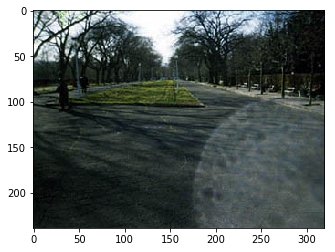

In [63]:
#show image:
plt.imshow(jpgimg)

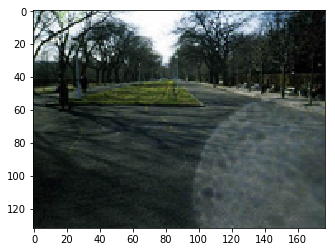

In [64]:
baseWidth=jpgim.size[0]
baseHeight=jpgim.size[1]
img = jpgim.resize((int(baseWidth/1.8),int(baseHeight/1.8)), Image.ANTIALIAS)
plt.imshow(img)

In [66]:
img.size

(177, 132)

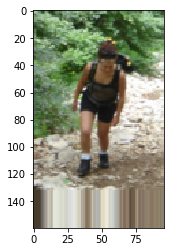

In [14]:
plt.imshow(pngimg)

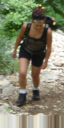

In [87]:
#Crop image operation for pos
new_width=64
new_height=128
width, height = pngim.size   # Get dimensions

left = (width - new_width)/2
top = (height - new_height)/2
right = (width + new_width)/2
bottom = (height + new_height)/2

pngim.crop((left, top, right, bottom))

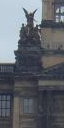

In [15]:
#crop image operatino for neg
new_width=64
new_height=128
width, height = jpgim.size   # Get dimensions
width=width-new_width
height=height-new_height
#select top left from available range
top=np.random.randint(0,height)
left=np.random.randint(0, width)
jpgim.crop((left, top, left+new_width, top+new_height))

In [12]:
pngimg.shape

(160, 96, 4)